# Exploratory Data Analysis - MasatiV2 Dataset

This dataset provides maritime scenes of optical aerial images from visible spectrum. The MASATI dataset contains color images in dynamic marine environments, and it can be used to evaluate ship detection methods. Each image may contain one or multiple targets in different weather and illumination conditions. The datasets is composed of 7,389 satellite images labeled according to the following seven classes: land, coast, sea, ship, multi, coast-ship, and detail. In addition, labeling with the bounding box for the location of the vessels is also included.
The dataset can be found through the following url: https://www.iuii.ua.es/datasets/masati/}

In [7]:
# Import necessary libraries
import os
import io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
from tqdm import tqdm

## Load the images

In [3]:
## Image Loading and Preprocessing
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """
    Load and preprocess an image.

    Args:
        image_path (str): Path to the image file
        target_size (tuple): Desired output size (width, height)

    Returns:
        PIL.Image: Preprocessed image
    """
    # Load image
    img = Image.open(image_path)

    # Convert to RGB if necessary
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize image
    img = img.resize(target_size, Image.Resampling.LANCZOS)

    return img


def load_images_from_directory(directory_path, target_size=(224, 224)):
    """
    Load all images from a directory and preprocess them.

    Args:
        directory_path (str): Path to the directory containing images
        target_size (tuple): Desired output size (width, height)

    Returns:
        list: List of preprocessed images
    """
    images = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

    for filename in tqdm(os.listdir(directory_path)):
        if os.path.splitext(filename)[1].lower() in valid_extensions:
            image_path = os.path.join(directory_path, filename)
            try:
                img = load_and_preprocess_image(image_path, target_size)
                images.append(img)
            except Exception as e:
                print(f"Error loading {filename}: {str(e)}")

    return images

# Load multiple images from a directory
root_dir = "E:/Datasets/masati-thesis/images"
images = load_images_from_directory(root_dir)

100%|██████████| 4522/4522 [01:11<00:00, 63.06it/s]


In [5]:
def parse_voc_xml(xml_path):
    """
    Parse PASCAL VOC annotation XML file.

    Args:
        xml_path (str): Path to XML annotation file

    Returns:
        tuple: (list of bounding boxes, list of class labels)
    """
    tree = ET.parse(xml_path)
    root = tree.getroot()

    boxes = []
    class_labels = []

    for obj in root.findall('object'):
        name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = float(bbox.find('xmin').text)
        ymin = float(bbox.find('ymin').text)
        xmax = float(bbox.find('xmax').text)
        ymax = float(bbox.find('ymax').text)

        boxes.append([xmin, ymin, xmax, ymax])
        class_labels.append(name)

    return boxes, class_labels

## Object Distribution

100%|██████████| 2368/2368 [00:00<00:00, 6076.03it/s]


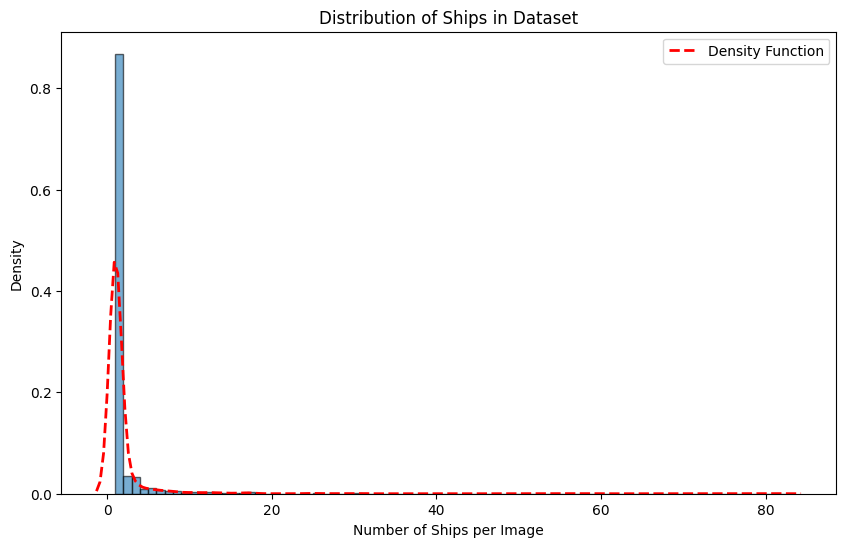

In [16]:
def create_ship_histogram(xml_folder):
    ship_counts = []

    # Loop over all XML files in the folder
    for xml_file in tqdm(os.listdir(xml_folder)):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(xml_folder, xml_file)
            _, class_labels = parse_voc_xml(xml_path)

            # Count the number of ships in this XML
            ship_count = len(class_labels)
            ship_counts.append(ship_count)

    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.hist(ship_counts, bins=range(min(ship_counts), max(ship_counts) + 2), edgecolor='black', density=True, alpha=0.6)

    # Add KDE density plot
    sns.kdeplot(ship_counts, color='red', linestyle='--', linewidth=2, label='Density Function')

    # Add labels and title
    plt.title('Distribution of Ships in Dataset')
    plt.xlabel('Number of Ships per Image')
    plt.ylabel('Density')
    plt.legend()

    # Show plot
    plt.show()

xml_folder = "E:/Datasets/masati-thesis/annotations"
create_ship_histogram(xml_folder)

100%|██████████| 304/304 [00:00<00:00, 5067.03it/s]


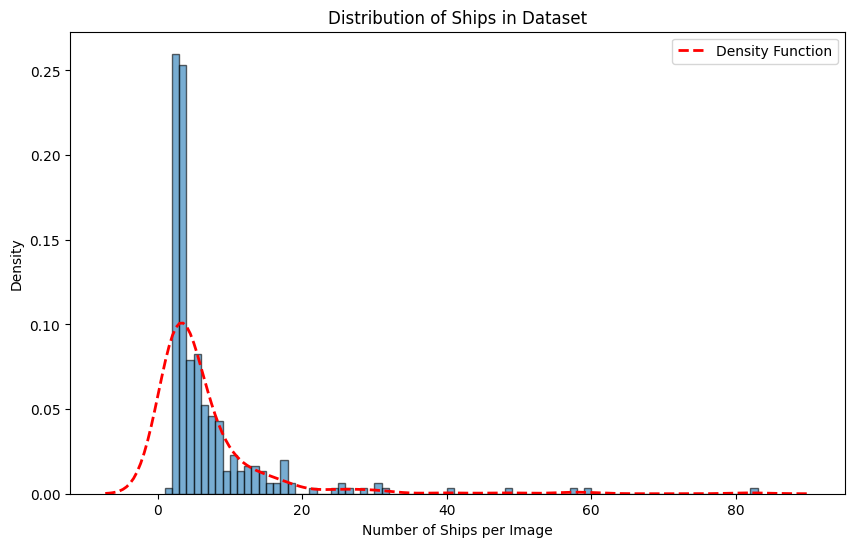

In [19]:
xml_folder = "E:/Datasets/MasatiV2/multi_labels"
create_ship_histogram(xml_folder)

100%|██████████| 1037/1037 [00:02<00:00, 430.52it/s]


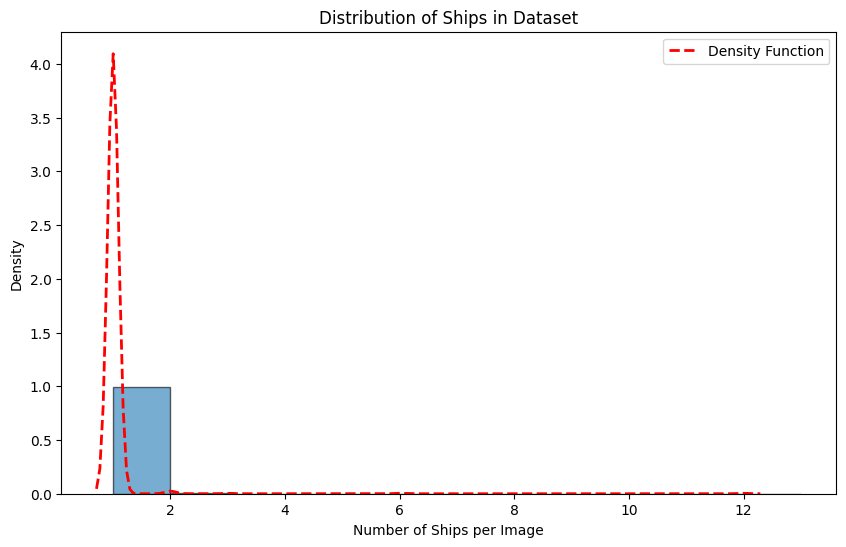

In [20]:
xml_folder = "E:/Datasets/MasatiV2/coast_ship_labels"
create_ship_histogram(xml_folder)